# The Spark Foundation #GRIP July21
**Role- Data Science and Business Analytics        
Author- Rahul Kumar**                 
**Task 1:** Predict the Score of the students based on no. of study hours        
Here We will predict the score if a student studies for a 9.25 hrs/day ?          
This is simple linear regression problem of two variable one is independent(Hours) and other is dependent variable(scores.
And this is Supervised ML.     



In [1]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
#Reading data from remote link
url = "http://bit.ly/w-data"
df1 = pd.read_csv(url)
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#check the data type
df1.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# Now check the missing values 
df1.isnull() #it will give in boolean 
df1.isnull().sum() # it will give total count od missing values

Hours     0
Scores    0
dtype: int64

In [5]:
# Now we will check correlation 
df1.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


So, we could say that **strong correlation** between study hours and scores.


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

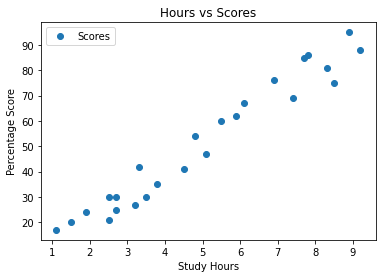

In [6]:
# Plotting the distribution of scores
df1.plot(x="Hours",y= "Scores", style= 'o')

plt.title("Hours vs Scores")
plt.xlabel('Study Hours')
plt.ylabel("Percentage Score")
plt.show()


**By, looking at graph we could also say that there is strong positive correlation between hours and scores**   

Now we will divide the data into independent variable(hours) and dependent varibale(scores) 

In [7]:
x= df1[['Hours']]
y= df1['Scores']

Now we will split this data into training and test sets. We'll do this by using Scikit-Learn's built-in **train_test_split()** method     
**(by taking taking trianing data 80% & test data 20% )**

In [8]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #Test data is 20% 



# Now we are going to Train the algorithm        

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [9]:
from sklearn.linear_model import LinearRegression  
# Creating object
reg= LinearRegression() 

#Training the model
reg.fit(x_train,y_train)

print('training is completed')


training is completed


Now we can find the coefficent and intercept for the line. 

In [10]:
# coeffiect can be find

a= reg.coef_
a 

array([9.73562384])

In [11]:
#intercept 
b= reg.intercept_
b

2.858199029210084

In [12]:
# line equation can write
y_line = a*x+b


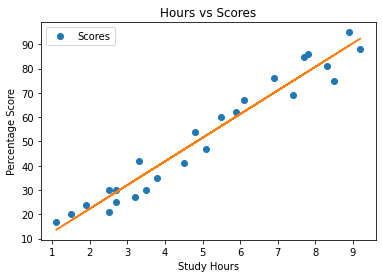

In [13]:
## plot the graph by using y_line

df1.plot(x="Hours",y= "Scores", style= 'o')
plt.plot(x,y_line)

plt.title("Hours vs Scores")
plt.xlabel('Study Hours')
plt.ylabel("Percentage Score")

plt.show()

# Now we will predict
we have completed the trainning, now its time to predict

In [14]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

    Hours
8     8.3
15    8.9
22    3.8
19    7.4
7     5.5


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})  
df 

,Actual,Predicted
8,81,83.663877
15,95,89.505251
22,35,39.853570
19,69,74.901815
7,60,56.404130


In [ ]:
# now we can predict the value Test the value for hours=9.25
Hours = float(input("Number of hours you studies"))
y_hat = reg.predict([[Hours]])
y_hat

print('The study hours = {}' .format(Hours))
print ('Percentage Score = {}'.format(y_hat[0]))

# Evaluating the model
final step to check the accuracy of the model by using score method.

In [17]:
print("R^2 Accuracy: ", reg.score(x_test, y_test))


R^2 Accuracy:  0.9470724423911627


We know the value of R^2 is closer to 1. It means our predicted model is good.     

